In [159]:
import pandas as pd 

In [160]:
yearly_elec = pd.read_csv('yearly_full_release_long_format.csv')

In [161]:
yearly_elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357052 entries, 0 to 357051
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Area                 357052 non-null  object 
 1   ISO 3 code           335602 non-null  object 
 2   Year                 357052 non-null  int64  
 3   Area type            357052 non-null  object 
 4   Continent            335602 non-null  object 
 5   Ember region         335602 non-null  object 
 6   EU                   335602 non-null  float64
 7   OECD                 335602 non-null  float64
 8   G20                  335602 non-null  float64
 9   G7                   335602 non-null  float64
 10  ASEAN                335602 non-null  float64
 11  Category             357052 non-null  object 
 12  Subcategory          357052 non-null  object 
 13  Variable             357052 non-null  object 
 14  Unit                 357052 non-null  object 
 15  Value            

In [162]:
#filter only uk 

uk_elec = yearly_elec[yearly_elec['Area'] == 'United Kingdom']

print(f"Filtered to UK: {len(uk_elec)} rows")
print(uk_elec.head())

Filtered to UK: 1630 rows
                  Area ISO 3 code  Year           Area type Continent  \
335630  United Kingdom        GBR  2000  Country or economy    Europe   
335631  United Kingdom        GBR  2000  Country or economy    Europe   
335632  United Kingdom        GBR  2000  Country or economy    Europe   
335633  United Kingdom        GBR  2000  Country or economy    Europe   
335634  United Kingdom        GBR  2000  Country or economy    Europe   

       Ember region   EU  OECD  G20   G7  ASEAN  Category     Subcategory  \
335630       Europe  0.0   1.0  1.0  1.0    0.0  Capacity  Aggregate fuel   
335631       Europe  0.0   1.0  1.0  1.0    0.0  Capacity  Aggregate fuel   
335632       Europe  0.0   1.0  1.0  1.0    0.0  Capacity  Aggregate fuel   
335633       Europe  0.0   1.0  1.0  1.0    0.0  Capacity  Aggregate fuel   
335634       Europe  0.0   1.0  1.0  1.0    0.0  Capacity  Aggregate fuel   

                                     Variable Unit  Value  \
335630     

Filtered demand data: 25 rows
                  Area ISO 3 code  Year           Area type Continent  \
335645  United Kingdom        GBR  2000  Country or economy    Europe   
335711  United Kingdom        GBR  2001  Country or economy    Europe   
335777  United Kingdom        GBR  2002  Country or economy    Europe   
335843  United Kingdom        GBR  2003  Country or economy    Europe   
335909  United Kingdom        GBR  2004  Country or economy    Europe   

       Ember region   EU  OECD  G20   G7  ASEAN            Category  \
335645       Europe  0.0   1.0  1.0  1.0    0.0  Electricity demand   
335711       Europe  0.0   1.0  1.0  1.0    0.0  Electricity demand   
335777       Europe  0.0   1.0  1.0  1.0    0.0  Electricity demand   
335843       Europe  0.0   1.0  1.0  1.0    0.0  Electricity demand   
335909       Europe  0.0   1.0  1.0  1.0    0.0  Electricity demand   

       Subcategory Variable Unit   Value  YoY absolute change  YoY % change  
335645      Demand   Deman

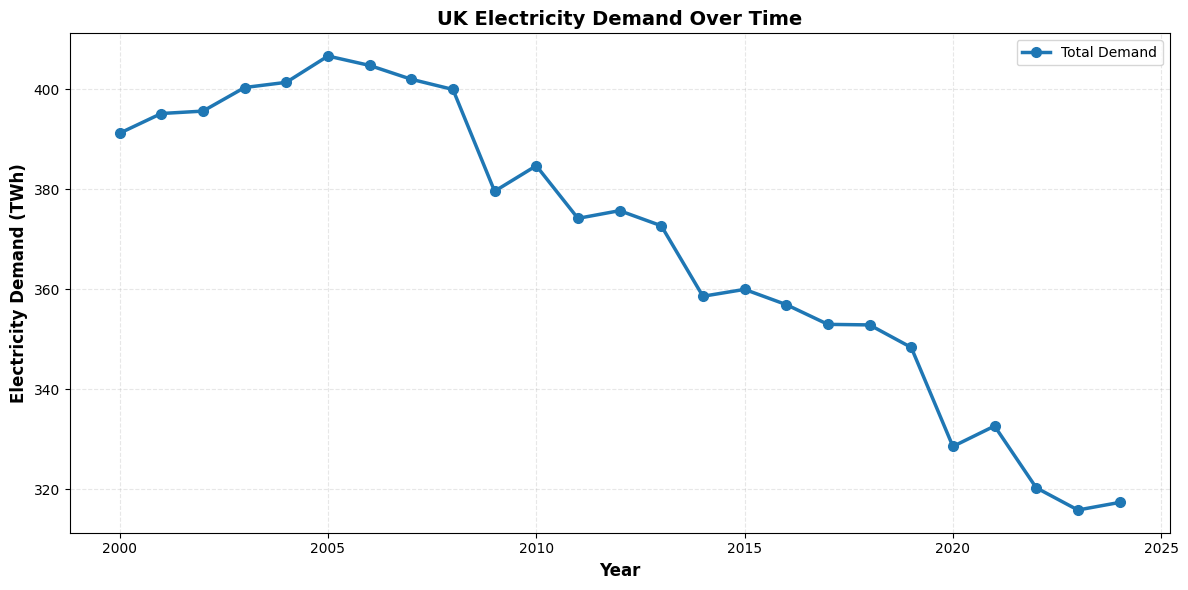


Demand statistics:
  Min: 315.8 TWh (2023)
  Max: 406.7 TWh (2005)
  Current: 317.4 TWh (2024)


In [163]:
#line graph of uk elec demand 

import matplotlib.pyplot as plt

# Filter for electricity demand
demand = uk_elec[
    (uk_elec['Category'] == 'Electricity demand') & 
    (uk_elec['Subcategory'] == 'Demand')
]

print(f"Filtered demand data: {len(demand)} rows")
print(demand.head())

# Create a figure
fig, ax = plt.subplots(figsize=(12, 6))

# Group by year and sum demand
yearly_demand = demand.groupby('Year')['Value'].sum()

ax.plot(yearly_demand.index, yearly_demand.values, marker='o', linewidth=2.5, markersize=7, color='#1f77b4', label='Total Demand')

ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Electricity Demand (TWh)', fontsize=12, fontweight='bold')
ax.set_title('UK Electricity Demand Over Time', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, linestyle='--')
ax.legend(fontsize=10)

plt.tight_layout()
plt.show()

print(f"\nDemand statistics:")
print(f"  Min: {yearly_demand.min():.1f} TWh ({yearly_demand.idxmin()})")
print(f"  Max: {yearly_demand.max():.1f} TWh ({yearly_demand.idxmax()})")
print(f"  Current: {yearly_demand.iloc[-1]:.1f} TWh ({yearly_demand.index[-1]})")

In [211]:
#demand percent decrease 

demand_df = uk_elec[
    (uk_elec['Category'] == 'Electricity demand') &
    (uk_elec['Subcategory'] == 'Demand') &
    (uk_elec['Unit'] == 'TWh')
].copy()

start_year = 2000
start_demand = demand_df.loc[
    demand_df['Year'] == start_year, 'Value'
].iloc[0]


mid_2020s_years = [2024]

mid_2020s_demand = (
    demand_df[demand_df['Year'].isin(mid_2020s_years)]
    ['Value']
    .mean()
)

percent_change = (
    (mid_2020s_demand - start_demand) / start_demand
) * 100

print(
    f"By the mid-2020s, electricity demand is "
    f"{abs(percent_change):.1f}% "
    f"{'lower' if percent_change < 0 else 'higher'} "
    f"than start-of-millennium levels."
)


By the mid-2020s, electricity demand is 18.9% lower than start-of-millennium levels.


In [164]:
# Filter for electricity generation
generation = uk_elec[(uk_elec['Category'] == 'Electricity generation') & (uk_elec['Subcategory'] == 'Fuel') & (uk_elec['Unit'] == 'TWh') ]

generation.tail(30)

,Area,ISO 3 code,Year,Area type,Continent,Ember region,EU,OECD,G20,G7,ASEAN,Category,Subcategory,Variable,Unit,Value,YoY absolute change,YoY % change
337050,United Kingdom,GBR,2021,Country or economy,Europe,Europe,0.0,1.0,1.0,1.0,0.0,Electricity generation,Fuel,Gas,TWh,122.84,10.95,9.79
337051,United Kingdom,GBR,2021,Country or economy,Europe,Europe,0.0,1.0,1.0,1.0,0.0,Electricity generation,Fuel,Hydro,TWh,5.42,-1.46,-21.22
337052,United Kingdom,GBR,2021,Country or economy,Europe,Europe,0.0,1.0,1.0,1.0,0.0,Electricity generation,Fuel,Nuclear,TWh,46.10,-4.14,-8.24
337053,United Kingdom,GBR,2021,Country or economy,Europe,Europe,0.0,1.0,1.0,1.0,0.0,Electricity generation,Fuel,Other Fossil,TWh,9.68,0.84,9.50
337054,United Kingdom,GBR,2021,Country or economy,Europe,Europe,0.0,1.0,1.0,1.0,0.0,Electricity generation,Fuel,Solar,TWh,12.13,-0.42,-3.35
337055,United Kingdom,GBR,2021,Country or economy,Europe,Europe,0.0,1.0,1.0,1.0,0.0,Electricity generation,Fuel,Wind,TWh,64.93,-10.69,-14.14
337110,United Kingdom,GBR,2022,Country or economy,Europe,Europe,0.0,1.0,1.0,1.0,0.0,Electricity generation,Fuel,Bioenergy,TWh,35.85,-4.16,-10.40
337111,United Kingdom,GBR,2022,Country or economy,Europe,Europe,0.0,1.0,1.0,1.0,0.0,Electricity generation,Fuel,Coal,TWh,5.94,-0.85,-12.52
337112,United Kingdom,GBR,2022,Country or economy,Europe,Europe,0.0,1.0,1.0,1.0,0.0,Electricity generation,Fuel,Gas,TWh,125.11,2.27,1.85
337113,United Kingdom,GBR,2022,Country or economy,Europe,Europe,0.0,1.0,1.0,1.0,0.0,Electricity generation,Fuel,Hydro,TWh,5.66,0.24,4.43


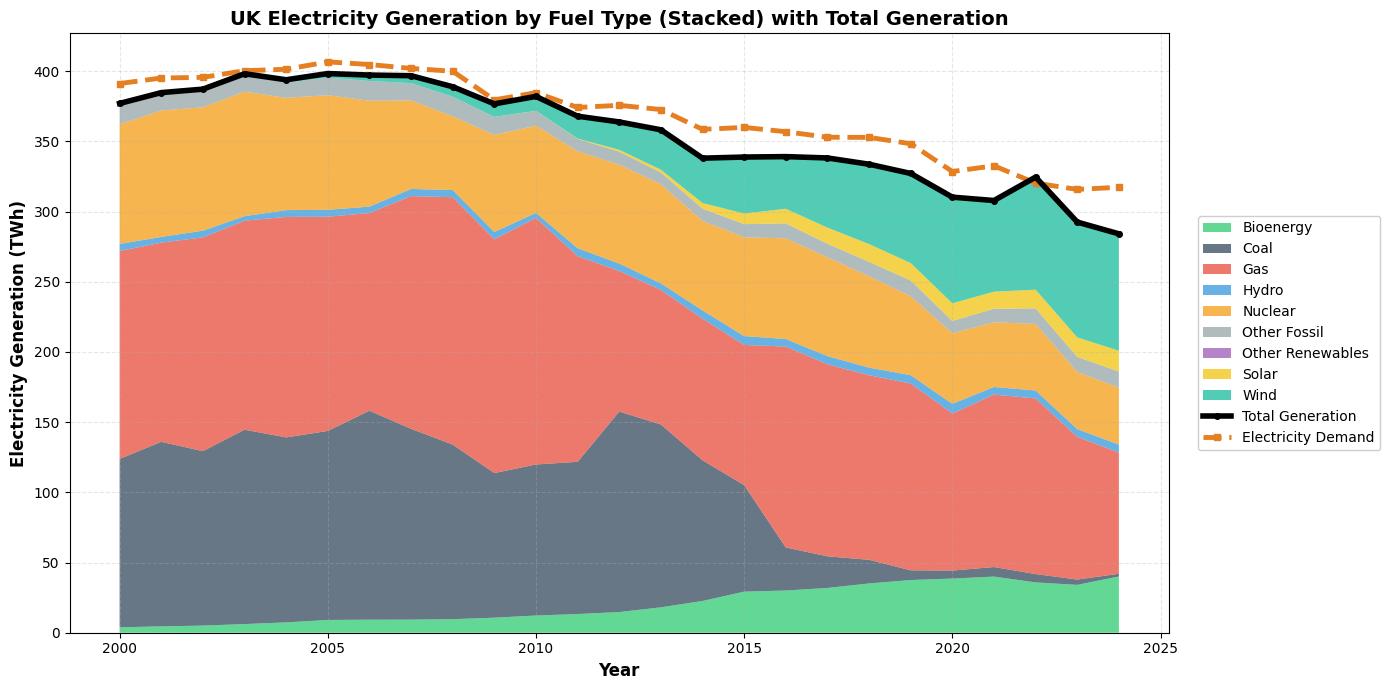


Generation statistics (2024):
  Total: 284.2 TWh
  Bioenergy: 40.1 TWh (14.1% of total)
  Coal: 1.9 TWh (0.7% of total)
  Gas: 86.3 TWh (30.4% of total)
  Hydro: 5.8 TWh (2.0% of total)
  Nuclear: 40.6 TWh (14.3% of total)
  Other Fossil: 11.4 TWh (4.0% of total)
  Other Renewables: 0.0 TWh (0.0% of total)
  Solar: 14.8 TWh (5.2% of total)
  Wind: 83.3 TWh (29.3% of total)


In [208]:
# =========================
# UK Electricity generation
# Stacked fuel area + total
# =========================

# Define the fuel types to include (explicit order = stack order)
fuel_types = [
    'Bioenergy', 'Coal', 'Gas', 'Hydro',
    'Nuclear', 'Other Fossil',
    'Other Renewables', 'Solar', 'Wind'
]

# --- Filter fuel-level electricity generation ---
fuel_gen = uk_elec[
    (uk_elec['Category'] == 'Electricity generation') &
    (uk_elec['Subcategory'] == 'Fuel') &
    (uk_elec['Variable'].isin(fuel_types)) &
    (uk_elec['Unit'] == 'TWh')
].copy()

# --- Pivot fuels ---
fuel_pivot = (
    fuel_gen
    .pivot_table(
        index='Year',
        columns='Variable',
        values='Value',
        aggfunc='sum'
    )
    .sort_index()
    .reindex(columns=fuel_types)     # enforce consistent column order
    .fillna(0)                        # stackplot-safe
)

# --- Compute total directly from fuels (robust & consistent) ---
total_by_year = fuel_pivot.sum(axis=1)

# --- Sanity checks (optional but recommended) ---
assert fuel_pivot.loc[2023, 'Wind'] > 0
assert fuel_pivot.loc[2024, 'Solar'] > 0

# --- Colors ---
colors = {
    'Bioenergy': '#2ecc71',
    'Coal': '#34495e',
    'Gas': '#e74c3c',
    'Hydro': '#3498db',
    'Nuclear': '#f39c12',
    'Other Fossil': '#95a5a6',
    'Other Renewables': '#9b59b6',
    'Solar': '#f1c40f',
    'Wind': '#1abc9c'
}

# --- Plot ---
fig, ax = plt.subplots(figsize=(14, 7))

x = fuel_pivot.index.values
y = [fuel_pivot[col].values for col in fuel_pivot.columns]

ax.stackplot(
    x,
    *y,
    labels=fuel_pivot.columns,
    colors=[colors[col] for col in fuel_pivot.columns],
    alpha=0.75
)

# --- Total line ---
ax.plot(
    x,
    total_by_year.values,
    color='black',
    linewidth=4,
    marker='o',
    markersize=4,
    label='Total Generation',
    zorder=10
)

# Add demand line on same axis
ax.plot(
    yearly_demand.index, 
    yearly_demand.values, 
    color='#e67e22', 
    linewidth=3.5, 
    label='Electricity Demand',
    marker='s',
    markersize=5,
    linestyle='--',
    zorder=9
)

# --- Styling ---
ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Electricity Generation (TWh)', fontsize=12, fontweight='bold')
ax.set_title(
    'UK Electricity Generation by Fuel Type (Stacked) with Total Generation',
    fontsize=14,
    fontweight='bold'
)

ax.grid(True, alpha=0.3, linestyle='--')
ax.legend(loc='center left',bbox_to_anchor=(1.02, 0.5), fontsize=10, framealpha=0.95)

plt.tight_layout()
plt.show()

# --- Latest year stats ---
latest_year = fuel_pivot.index.max()
total_gen = total_by_year.loc[latest_year]

print(f"\nGeneration statistics ({latest_year}):")
print(f"  Total: {total_gen:.1f} TWh")

for fuel in fuel_pivot.columns:
    fuel_value = fuel_pivot.loc[latest_year, fuel]
    fuel_share = (fuel_value / total_gen) * 100 if total_gen != 0 else 0

    print(
        f"  {fuel}: {fuel_value:.1f} TWh "
        f"({fuel_share:.1f}% of total)"
    )



In [210]:
#TRENDS BETWEEN RENEWABLE OUTPUTS 

df = uk_elec[
    (uk_elec['Category'] == 'Electricity generation') &
    (uk_elec['Subcategory'] == 'Fuel') &
    (uk_elec['Variable'].isin(fuel_types)) &
    (uk_elec['Unit'] == 'TWh')
].copy()

first_year = df['Year'].min()
last_year = df['Year'].max()

total_first_year = df[df['Year'] == first_year]['Value'].sum()
total_last_year = df[df['Year'] == last_year]['Value'].sum()

result = (
    df[df['Year'].isin([first_year, last_year])]
    .groupby(['Variable', 'Year'])['Value']
    .sum()
    .reset_index()
    .pivot(index='Variable', columns='Year', values='Value')
    .rename(columns={
        first_year: 'first_year_TWh',
        last_year: 'last_year_TWh'
    })
    .reset_index()
)

result['first_year_share_%'] = (
    result['first_year_TWh'] / total_first_year * 100
)

result['last_year_share_%'] = (
    result['last_year_TWh'] / total_last_year * 100
)

result

Year,Variable,first_year_TWh,last_year_TWh,first_year_share_%,last_year_share_%
0,Bioenergy,3.88,40.09,1.029014,14.108249
1,Coal,119.95,1.90,31.811913,0.668637
2,Gas,148.08,86.30,39.272264,30.370214
3,Hydro,5.09,5.76,1.349918,2.027027
4,Nuclear,85.06,40.59,22.558744,14.284206
5,Other Fossil,14.06,11.45,3.728850,4.029420
6,Other Renewables,0.00,NaN,0.000000,NaN
7,Solar,0.00,14.79,0.000000,5.204814
8,Wind,0.94,83.28,0.249297,29.307432


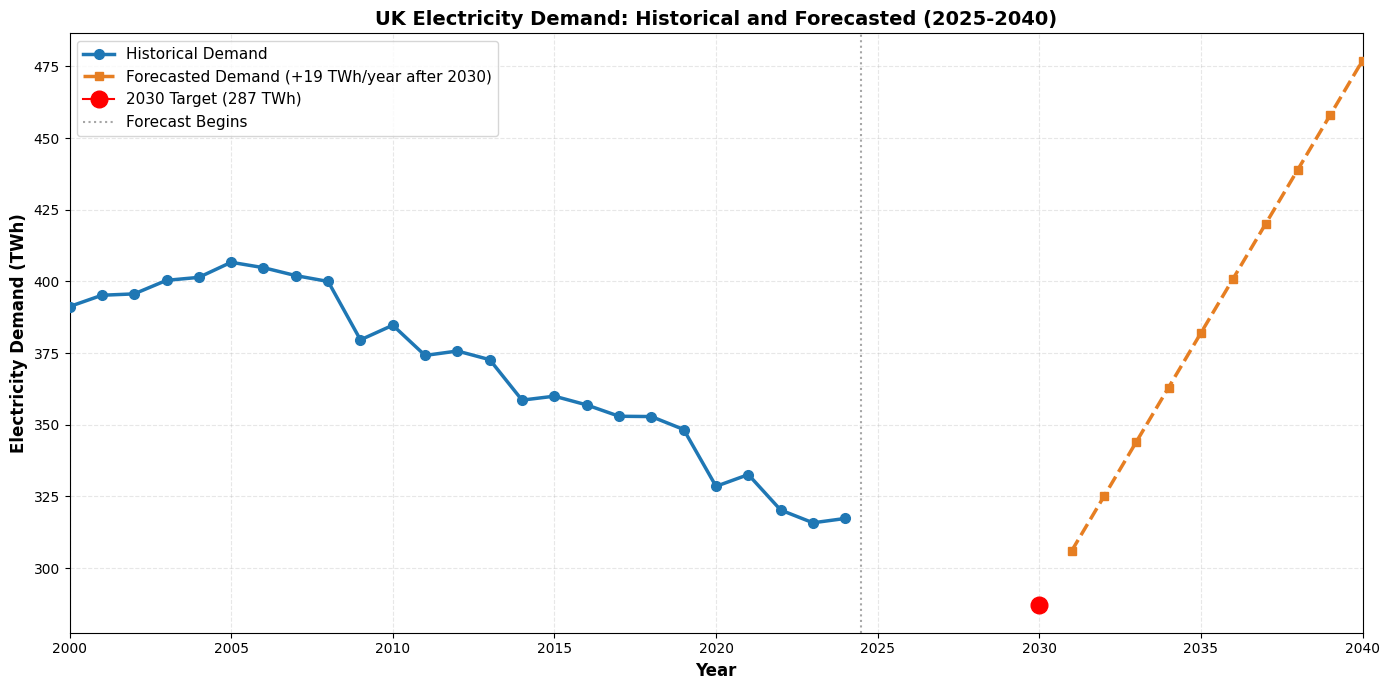


Demand Forecast Summary:
  Latest historical year (2024): 317.4 TWh
  Target at 2030: 287.0 TWh
  Annual addition after 2030: 19 TWh/year

Forecast milestones:
  2030: 287.0 TWh
  2035: 382.0 TWh
  2040: 477.0 TWh


In [167]:
#future trends 

# Create demand forecast
latest_year = yearly_demand.index[-1]
latest_demand = yearly_demand.iloc[-1]

# Forecast parameters
target_2030 = 287  # TWh at 2030
annual_growth_after_2030 = 19  # TWh per year

# Create forecast years and values
forecast_years = []
forecast_values = []

# Add 2030 as a single point at 287 TWh
forecast_years.append(2030)
forecast_values.append(target_2030)

# After 2030, add 19 TWh per year
current_value = target_2030
for year in range(2031, 2041):
    current_value += annual_growth_after_2030
    forecast_years.append(year)
    forecast_values.append(current_value)

# Create a figure
fig, ax = plt.subplots(figsize=(14, 7))

# Plot historical demand (solid line)
ax.plot(
    yearly_demand.index, 
    yearly_demand.values, 
    marker='o', 
    linewidth=2.5, 
    markersize=7, 
    color='#1f77b4', 
    label='Historical Demand',
    zorder=5
)

# Plot forecast demand (dashed line from 2031 onwards)
forecast_years_line = forecast_years[1:]  # Exclude 2030 for the line
forecast_values_line = forecast_values[1:]  # Exclude 2030 for the line

ax.plot(
    forecast_years_line, 
    forecast_values_line, 
    marker='s', 
    linewidth=2.5, 
    markersize=6,
    color='#e67e22',
    linestyle='--',
    label='Forecasted Demand (+19 TWh/year after 2030)',
    zorder=5
)

# Plot 2030 point as a red dot
ax.plot(
    [2030],
    [target_2030],
    marker='o',
    markersize=12,
    color='red',
    label='2030 Target (287 TWh)',
    zorder=6
)

# Add a vertical line at the forecast start
ax.axvline(x=latest_year + 0.5, color='gray', linestyle=':', linewidth=1.5, alpha=0.7, label='Forecast Begins')

ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Electricity Demand (TWh)', fontsize=12, fontweight='bold')
ax.set_title('UK Electricity Demand: Historical and Forecasted (2025-2040)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, linestyle='--')
ax.legend(fontsize=11, loc='upper left')
ax.set_xlim(yearly_demand.index[0], 2040)
plt.tight_layout()
plt.show()

# Print forecast summary
print(f"\nDemand Forecast Summary:")
print(f"  Latest historical year ({latest_year}): {latest_demand:.1f} TWh")
print(f"  Target at 2030: {target_2030:.1f} TWh")
print(f"  Annual addition after 2030: {annual_growth_after_2030} TWh/year")
print(f"\nForecast milestones:")
for year in [2025, 2030, 2035, 2040]:
    if year in forecast_years:
        idx = forecast_years.index(year)
        print(f"  {year}: {forecast_values[idx]:.1f} TWh")


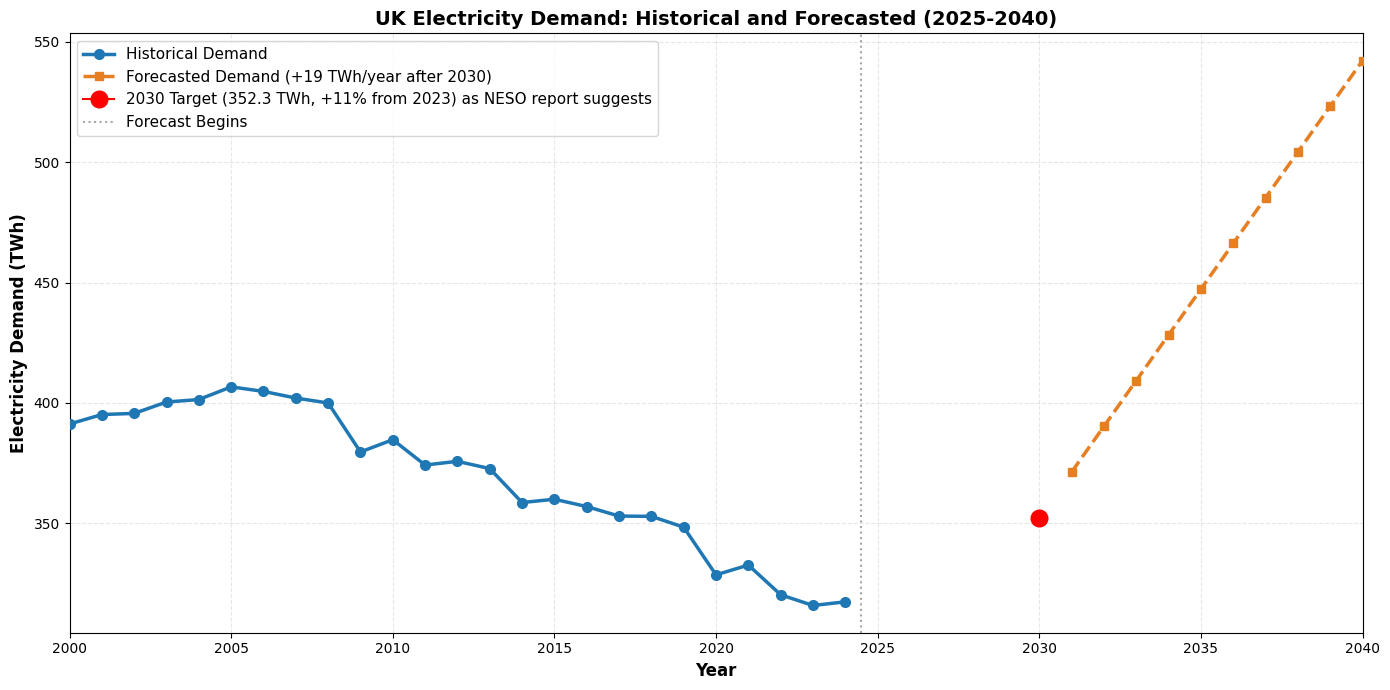


Demand Forecast Summary:
  Latest historical year (2023): 316.4 TWh
  Target at 2030: 352.3 TWh (+11% increase)
  Annual addition after 2030: 19 TWh/year

Forecast milestones:
  2030: 352.3 TWh
  2035: 447.3 TWh
  2040: 542.3 TWh


In [168]:
#demand forecast with 11% increase by 2030 

# Create demand forecast
latest_year = yearly_demand.index[-1]
latest_demand = yearly_demand.iloc[-1]

# Forecast parameters
# 2030 target is 11% increase from latest year
target_2030 = latest_demand * 1.11
annual_growth_after_2030 = 19  # TWh per year

# Create forecast years and values
forecast_years = []
forecast_values = []

# Add 2030 as a single point (11% increase from latest demand)
forecast_years.append(2030)
forecast_values.append(target_2030)

# After 2030, add 19 TWh per year
current_value = target_2030
for year in range(2031, 2041):
    current_value += annual_growth_after_2030
    forecast_years.append(year)
    forecast_values.append(current_value)

# Create a figure
fig, ax = plt.subplots(figsize=(14, 7))

# Plot historical demand (solid line)
ax.plot(
    yearly_demand.index, 
    yearly_demand.values, 
    marker='o', 
    linewidth=2.5, 
    markersize=7, 
    color='#1f77b4', 
    label='Historical Demand',
    zorder=5
)

# Plot forecast demand (dashed line from 2031 onwards)
forecast_years_line = forecast_years[1:]  # Exclude 2030 for the line
forecast_values_line = forecast_values[1:]  # Exclude 2030 for the line

ax.plot(
    forecast_years_line, 
    forecast_values_line, 
    marker='s', 
    linewidth=2.5, 
    markersize=6,
    color='#e67e22',
    linestyle='--',
    label='Forecasted Demand (+19 TWh/year after 2030)',
    zorder=5
)

# Plot 2030 point as a red dot (11% increase from latest year)
ax.plot(
    [2030],
    [target_2030],
    marker='o',
    markersize=12,
    color='red',
    label=f'2030 Target ({target_2030:.1f} TWh, +11% from {latest_year - 1}) as NESO report suggests',
    zorder=6
)

# Add a vertical line at the forecast start
ax.axvline(x=latest_year + 0.5, color='gray', linestyle=':', linewidth=1.5, alpha=0.7, label='Forecast Begins')

ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Electricity Demand (TWh)', fontsize=12, fontweight='bold')
ax.set_title('UK Electricity Demand: Historical and Forecasted (2025-2040)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, linestyle='--')
ax.legend(fontsize=11, loc='upper left')
ax.set_xlim(yearly_demand.index[0], 2040)

plt.tight_layout()
plt.show()

# Print forecast summary
print(f"\nDemand Forecast Summary:")
print(f"  Latest historical year ({latest_year-1}): {latest_demand-1 :.1f} TWh")
print(f"  Target at 2030: {target_2030:.1f} TWh (+11% increase)")
print(f"  Annual addition after 2030: {annual_growth_after_2030} TWh/year")
print(f"\nForecast milestones:")
for year in [2030, 2035, 2040]:
    if year in forecast_years:
        idx = forecast_years.index(year)
        print(f"  {year}: {forecast_values[idx]:.1f} TWh")

In [169]:
#cross checking report "This means an electricity demand growth of 11% to 287 TWh in 2030"

demand_2023 = yearly_demand.iloc[-2]

demand_2023

np.float64(315.83)

In [170]:
"""
note the differences in the demand announced 

"""

'\nnote the differences in the demand announced \n\n'

In [171]:
#infrastructure and energy farms 

farm_data = pd.read_csv('REPD_Publication_Q3_2025.csv', encoding= 'ISO-8859-1')
farm_data

,Old Ref ID,Ref ID,Record Last Updated (dd/mm/yyyy),Operator (or Applicant),Site Name,Technology Type,Storage Type,Storage Co-location REPD Ref ID,Installed Capacity (MWelec),Share Community Scheme,...,Appeal Granted,Planning Permission Granted,Secretary of State - Intervened,Secretary of State - Refusal,Secretary of State - Granted,Planning Permission Expired,Under Construction,Operational,Heat Network Ref,Solar Site Area (sqm)
0,1,10726459,07/07/2009,RWE npower,Aberthaw Power Station Biomass,Biomass (co-firing),NaN,NaN,35.00,NaN,...,NaN,03/09/2004,NaN,NaN,NaN,NaN,01/05/2006,01/05/2007,NaN,NaN
1,2,NaN,20/11/2017,Orsted (formerly Dong Energy) / Peel Energy,Hunterston - cofiring,Biomass (co-firing),NaN,NaN,170.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,12019680,20/12/2019,Scottish and Southern Energy (SSE),Ferrybridge Multifuel 2 (FM2),EfW Incineration,NaN,NaN,70.00,NaN,...,NaN,28/10/2015,NaN,NaN,NaN,28/10/2020,01/09/2016,20/12/2019,NaN,NaN
3,4,11877116,18/12/2003,Energy Power Resources,Thetford Biomass Power Station,Biomass (dedicated),NaN,NaN,38.50,NaN,...,NaN,05/05/1995,NaN,NaN,NaN,NaN,NaN,02/10/1998,NaN,NaN
4,5,NaN,29/09/2005,Agrigen,Nunn Mills Road Biomass Plant,Biomass (dedicated),NaN,NaN,8.80,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13519,19571,12694579,06/10/2025,Apatura - GPC 680 Limited,"East Rogerton Cottage, Markethill Road - Batte...",Battery,Stand-alone Storage,NaN,55.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13520,19574,12678706,13/10/2025,RWE,The Tween Bridge Solar Farm,Battery,Co-located with RE,12926,400.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13521,19577,12803662,13/10/2025,Fred Olsen Renewables,Crystal Rig Phase 1 Repowering,Wind Onshore,NaN,NaN,72.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13522,19581,12842889,13/10/2025,Energiekontor (UK) Limited,Meall Dearg Wind Farm - Wind Farm,Battery,Co-located with RE,18494,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [172]:
farm_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13524 entries, 0 to 13523
Data columns (total 53 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Old Ref ID                               13524 non-null  int64  
 1   Ref ID                                   11808 non-null  object 
 2   Record Last Updated (dd/mm/yyyy)         13524 non-null  object 
 3   Operator (or Applicant)                  13522 non-null  object 
 4   Site Name                                13521 non-null  object 
 5   Technology Type                          13524 non-null  object 
 6   Storage Type                             2566 non-null   object 
 7   Storage Co-location REPD Ref ID          1518 non-null   object 
 8   Installed Capacity (MWelec)              12340 non-null  object 
 9   Share Community Scheme                   149 non-null    object 
 10  CHP Enabled                              8647 

In [173]:

status_map = {
    "Operational": "Operational",
    "Under Construction": "Under Construction",
    "Awaiting Construction": "Planned",
    "Application Submitted": "Planned",
    "Appeal Lodged": "Planned",
    "Revised": "Planned",
    "No Application Required": "Planned",
    "Application Refused": "Cancelled",
    "Appeal Refused": "Cancelled",
    "Application Withdrawn": "Cancelled",
    "Appeal Withdrawn": "Cancelled",
    "Planning Permission Expired": "Cancelled",
    "Abandoned": "Cancelled",
    "Decommissioned": "Decommissioned"
}

#apply mapping
farm_data["status"] = farm_data["Development Status (short)"].map(status_map)

farm_data["status"].value_counts()

status
Planned               7476
Operational           3045
Cancelled             2558
Under Construction     414
Decommissioned          31
Name: count, dtype: int64

In [174]:
# table 1 -- see current projects all over the uk 
# 
# print(farm_data['Technology Type'].str.contains('biomass', case=False, na=False))

technology = ['biomass', 'incineration', 'conversion', 'hydro', 'digestion', 'battery', 'solar', 'sewage','tidal', 'wave', 'wind', 'rocks', 'liquid', 'hydrogen', 'Hydroelectricity', 'flywheels', 'air', 'geothermal', 'heat']
#
total = 0

for tech in technology:
    count = farm_data[
        farm_data['Technology Type'].str.contains(tech, case=False, na=False) &
        (farm_data['status'].str.lower() == 'operational')
    ].shape[0]

    total += count
    print('Operational', tech, count)

print('Total Operational', total)


Operational biomass 84
Operational incineration 60
Operational conversion 20
Operational hydro 102
Operational digestion 163
Operational battery 136
Operational solar 1379
Operational sewage 12
Operational tidal 5
Operational wave 2
Operational wind 819
Operational rocks 1
Operational liquid 1
Operational hydrogen 1
Operational Hydroelectricity 4
Operational flywheels 1
Operational air 2
Operational geothermal 1
Operational heat 0
Total Operational 2793


In [175]:
#planned 
for tech in technology: 
    count = farm_data[
        farm_data['Technology Type'].str.contains(tech, case=False, na=False) &
        (farm_data['status'].str.lower() == 'planned')
    ].shape[0]

    print('Planned', tech, count)

Planned biomass 79
Planned incineration 64
Planned conversion 23
Planned hydro 102
Planned digestion 107
Planned battery 1849
Planned solar 4342
Planned sewage 0
Planned tidal 11
Planned wave 2
Planned wind 879
Planned rocks 0
Planned liquid 2
Planned hydrogen 49
Planned Hydroelectricity 14
Planned flywheels 0
Planned air 5
Planned geothermal 5
Planned heat 2


In [176]:
#find planned year distribution 

In [177]:
#TODO: fidn an aevrage construction year 

#Under Construction 
for tech in technology: 
    count = farm_data[
        farm_data['Technology Type'].str.contains(tech, case=False, na=False) &
        (farm_data['status'].str.lower() == 'under construction')
    ].shape[0]

    print('Under Construction ', tech, count)

Under Construction  biomass 8
Under Construction  incineration 19
Under Construction  conversion 9
Under Construction  hydro 14
Under Construction  digestion 12
Under Construction  battery 110
Under Construction  solar 193
Under Construction  sewage 0
Under Construction  tidal 1
Under Construction  wave 0
Under Construction  wind 47
Under Construction  rocks 1
Under Construction  liquid 0
Under Construction  hydrogen 4
Under Construction  Hydroelectricity 0
Under Construction  flywheels 0
Under Construction  air 0
Under Construction  geothermal 0
Under Construction  heat 0


In [178]:
#find the total installed capacity of each technology 

farm_data['Installed Capacity (MWelec)'] = pd.to_numeric(
    farm_data['Installed Capacity (MWelec)'],
    errors='coerce'
)


for tech in technology:
    total_capacity = (
        farm_data.loc[
            farm_data['Technology Type'].str.contains(tech, case=False, na=False),
            'Installed Capacity (MWelec)'
        ]
        .sum()
    )

    print(f"{tech}: total capacity = {total_capacity}")


biomass: total capacity = 10574.33
incineration: total capacity = 4866.18
conversion: total capacity = 1855.4
hydro: total capacity = 17173.350000000002
digestion: total capacity = 834.35
battery: total capacity = 135057.95
solar: total capacity = 63184.17999999999
sewage: total capacity = 50.2
tidal: total capacity = 1088.1999999999998
wave: total capacity = 109.0
wind: total capacity = 126297.65999999999
rocks: total capacity = 10.0
liquid: total capacity = 105.19999999999999
hydrogen: total capacity = 3807.51
Hydroelectricity: total capacity = 12568.099999999999
flywheels: total capacity = 400.0
air: total capacity = 111.69999999999999
geothermal: total capacity = 49.0
heat: total capacity = 1.5


In [179]:
status = [ 'planned','under construction','operational']

capacity_factor = 0.35  # assumed average
hours_per_year = 8760

for statu in status: 
    total_capacity_mw = (
            farm_data.loc[
                farm_data['status'].str.contains(statu, case=False, na=False),
                'Installed Capacity (MWelec)'
            ]
            .sum()
        )

    total_twh = (
        total_capacity_mw * capacity_factor * hours_per_year / 1e6
    )

    print(
        f"{statu}: "
        f"capacity = {total_capacity_mw:.1f} MW | "
        f"~ {total_twh:.2f} TWh/year")


planned: capacity = 242575.7 MW | ~ 743.74 TWh/year
under construction: capacity = 19678.9 MW | ~ 60.34 TWh/year
operational: capacity = 54154.1 MW | ~ 166.04 TWh/year


In [180]:
#turn 378143.81 MWelec to TWh

# Given capacity in MW
capacity_mw = 378143.81

# Constants
hours_per_year = 8760

# Convert MW → MWh → TWh
energy_twh = (capacity_mw * hours_per_year * capacity_factor) / 1_000_000

print(f"{energy_twh:.2f} TWh per year")


1159.39 TWh per year


In [181]:
#find construction timeline on average 


farm_data['Under Construction'] = pd.to_datetime(farm_data['Under Construction'], dayfirst=True, errors='coerce')
farm_data['Operational'] = pd.to_datetime(farm_data['Operational'], dayfirst=True, errors='coerce')

# Construction duration in days
farm_data['Construction Duration (days)'] = (
    farm_data['Operational'] - farm_data['Under Construction']
).dt.days

farm_data['Construction Duration (years)'] = farm_data['Construction Duration (days)'] / 365.25

avg_construction = (
    farm_data
    .groupby('Technology Type')['Construction Duration (years)']
    .mean()
    .sort_values()
)

print(avg_construction)


Technology Type
Shoreline Wave                      0.251882
Solar Photovoltaics                 0.310650
Flywheels                           0.418891
Biomass (co-firing)                 0.496464
Battery                             0.634439
Landfill Gas                        0.669405
Wind Onshore                        1.046279
Sewage Sludge Digestion             1.068857
Tidal Stream                        1.094114
Anaerobic Digestion                 1.099271
Small Hydro                         1.497222
Biomass (dedicated)                 1.518969
Liquid Air Energy Storage           1.556468
Wind Offshore                       1.584360
Advanced Conversion Technologies    2.171298
Large Hydro                         2.210815
EfW Incineration                    2.916593
Hot Dry Rocks (HDR)                 3.214237
Pumped Storage Hydroelectricity     5.000000
Air Source Heat Pumps                    NaN
Compressed Air Energy Storage            NaN
Fuel Cell (Hydrogen)                   

C:\Users\ikisy\AppData\Local\Temp\ipykernel_8172\741607651.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


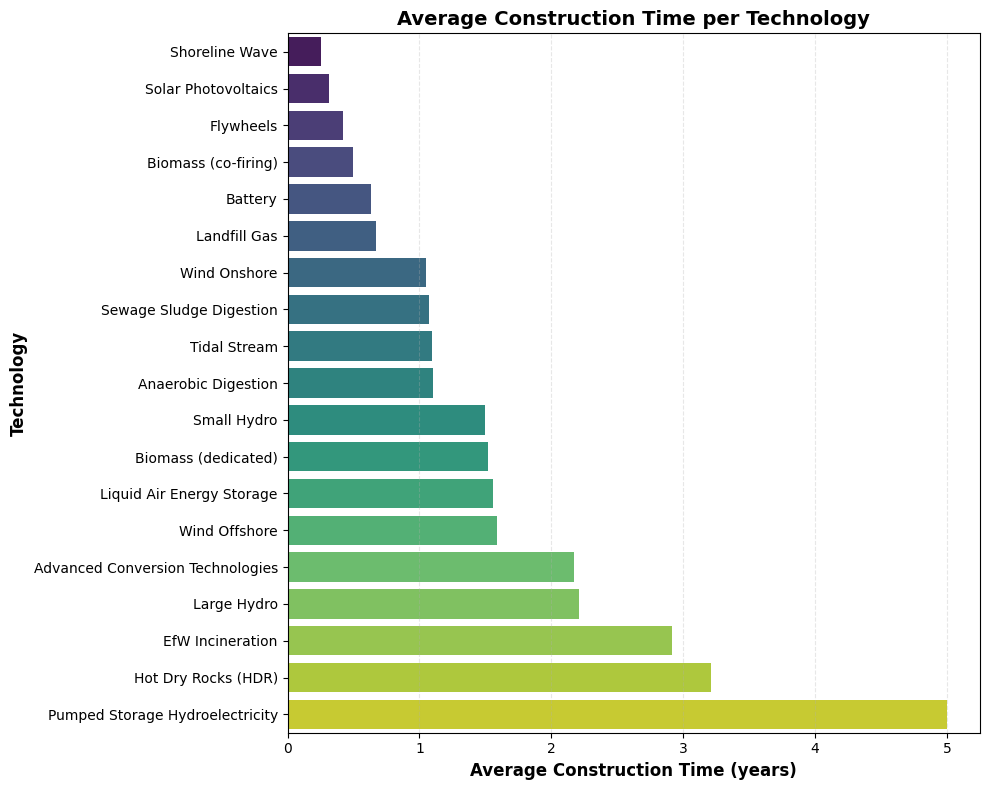

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort data by average construction time
avg_construction = avg_construction.dropna()


avg_construction_sorted = avg_construction.sort_values()

plt.figure(figsize=(10, 8))
sns.barplot(
    x=avg_construction_sorted.values,
    y=avg_construction_sorted.index,
    palette='viridis'
)

plt.xlabel("Average Construction Time (years)", fontsize=12, fontweight='bold')
plt.ylabel("Technology", fontsize=12, fontweight='bold')
plt.title("Average Construction Time per Technology", fontsize=14, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [183]:
#longest, wind, solar, biomass

def classify_tech(x):
    x = x.lower()
    if 'wind' in x:
        return 'Wind'
    elif 'solar' in x:
        return 'Solar'
    elif 'biomass' in x:
        return 'Biomass'
    else:
        return None

farm_data['Tech Group'] = farm_data['Technology Type'].apply(classify_tech)

filtered = farm_data[
    farm_data['Tech Group'].notna() &
    farm_data['Construction Duration (years)'].notna()
]

longest_each = (
    filtered
    .groupby('Tech Group')['Construction Duration (years)']
    .max()
)

print(longest_each)

longest_projects = filtered.loc[
    filtered.groupby('Tech Group')['Construction Duration (years)'].idxmax(),
    ['Technology Type', 'Construction Duration (years)', 'Under Construction', 'Operational']
]

print(longest_projects)




Tech Group
Biomass    4.717317
Solar      4.791239
Wind       5.127995
Name: Construction Duration (years), dtype: float64
          Technology Type  Construction Duration (years) Under Construction  \
130   Biomass (dedicated)                       4.717317         2009-06-01   
1570  Solar Photovoltaics                       4.791239         2017-01-16   
3230         Wind Onshore                       5.127995         2006-05-01   

     Operational  
130   2014-02-18  
1570  2021-11-01  
3230  2011-06-17  


In [184]:
#now plannoing timeline

start_col = 'Planning Application Submitted'
end_col = 'Planning Permission Granted'

exclude_cols = [
    'Planning Application Withdrawn',
    'Planning Permission Refused',
    'Appeal Lodged',
    'Appeal Withdrawn',
    'Appeal Refused',
    'Appeal Granted'
]

date_cols = [start_col, end_col] + exclude_cols

# Convert date columns to datetime
for col in date_cols:
    if col in farm_data.columns:
        farm_data[col] = pd.to_datetime(farm_data[col], errors='coerce')

# Filter valid planning cases
filtered = farm_data[
    farm_data[start_col].notna() &
    farm_data[end_col].notna() &
    farm_data[exclude_cols].isna().all(axis=1)
].copy()

# Calculate planning duration in years
filtered['duration_years'] = (
    (filtered[end_col] - filtered[start_col]).dt.days / 365.25
)

# 🚫 Drop negative durations
filtered = filtered[filtered['duration_years'] >= 0].copy()

# Aggregate by technology
duration_by_tech = (
    filtered
    .groupby('Technology Type')['duration_years']
    .agg(['count', 'mean', 'median', 'min', 'max'])
    .sort_values('mean')
)

print("\nPlanning duration (years) by technology (negative durations removed):")
print(duration_by_tech.round(2))



Planning duration (years) by technology (negative durations removed):
                                  count  mean  median   min    max
Technology Type                                                   
Fuel Cell (Hydrogen)                  1  0.15    0.15  0.15   0.15
Compressed Air Energy Storage         1  0.24    0.24  0.24   0.24
Large Hydro                           3  0.53    0.43  0.33   0.82
Sewage Sludge Digestion               3  0.53    0.28  0.17   1.14
Liquid Air Energy Storage             2  0.54    0.54  0.26   0.82
Solar Photovoltaics                1382  0.58    0.44  0.00   7.11
Tidal Stream                          5  0.78    0.54  0.02   1.52
Anaerobic Digestion                  82  0.84    0.70  0.00   5.68
Advanced Conversion Technologies     31  0.91    0.49  0.00   3.80
Battery                             381  0.91    0.70  0.00   6.10
Landfill Gas                         75  0.92    0.65  0.00   9.52
Biomass (dedicated)                  77  0.99    0.70  0.0

C:\Users\ikisy\AppData\Local\Temp\ipykernel_8172\2100390476.py:20: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  farm_data[col] = pd.to_datetime(farm_data[col], errors='coerce')
C:\Users\ikisy\AppData\Local\Temp\ipykernel_8172\2100390476.py:20: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  farm_data[col] = pd.to_datetime(farm_data[col], errors='coerce')
C:\Users\ikisy\AppData\Local\Temp\ipykernel_8172\2100390476.py:20: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  farm_data[col] = pd.to_datetime(farm_data[col], errors='coerce')
C:\Users\ikisy\AppData\Local\Temp\ipykernel_8172\2100390476.py:20: UserWarning: Parsing dates in %d/%m/%Y format wh

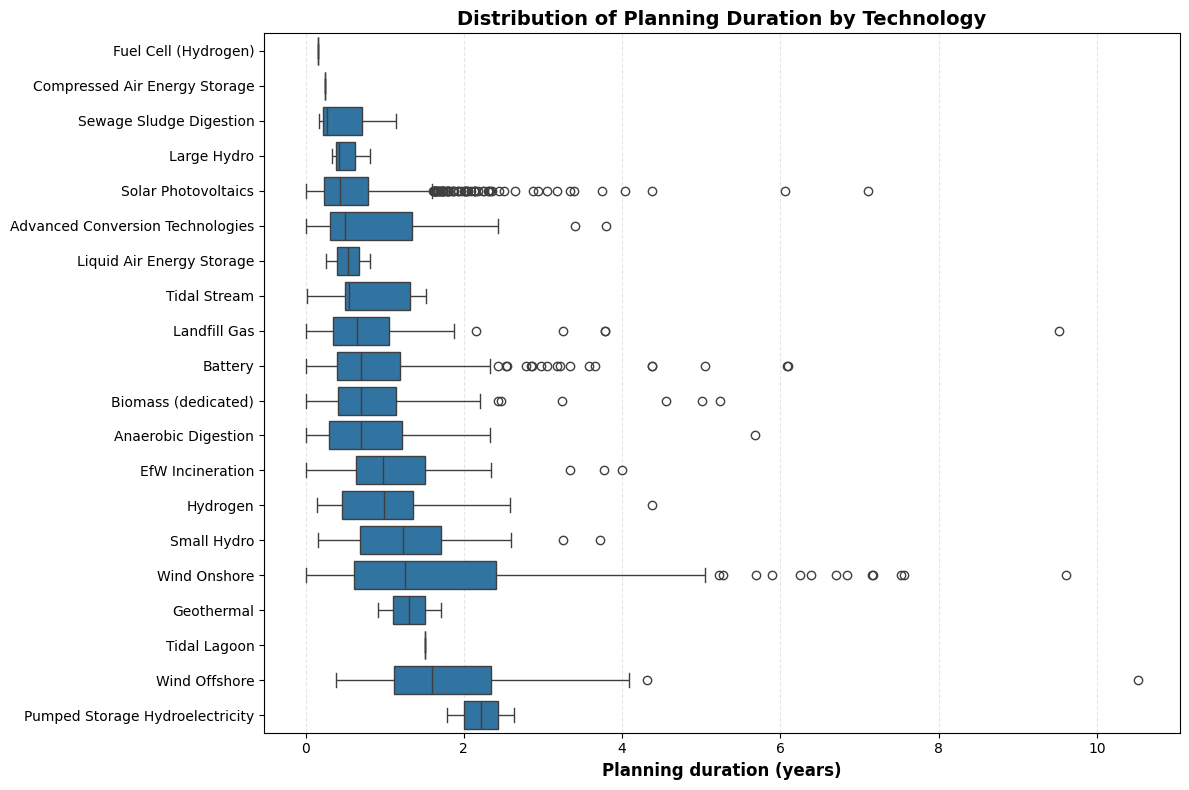

In [185]:
#visualize 

plot_df = filtered[filtered['duration_years'] >= 0].copy()

# Order technologies by median duration
order = (
    plot_df
    .groupby('Technology Type')['duration_years']
    .median()
    .sort_values()
    .index
)

plt.figure(figsize=(12, 8))

sns.boxplot(
    data=plot_df,
    y='Technology Type',
    x='duration_years',
    order=order,
    showfliers=True,
    linewidth=1
)

plt.xlabel('Planning duration (years)', fontsize=12, fontweight='bold')
plt.ylabel('')
plt.title('Distribution of Planning Duration by Technology', fontsize=14, fontweight='bold')

plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


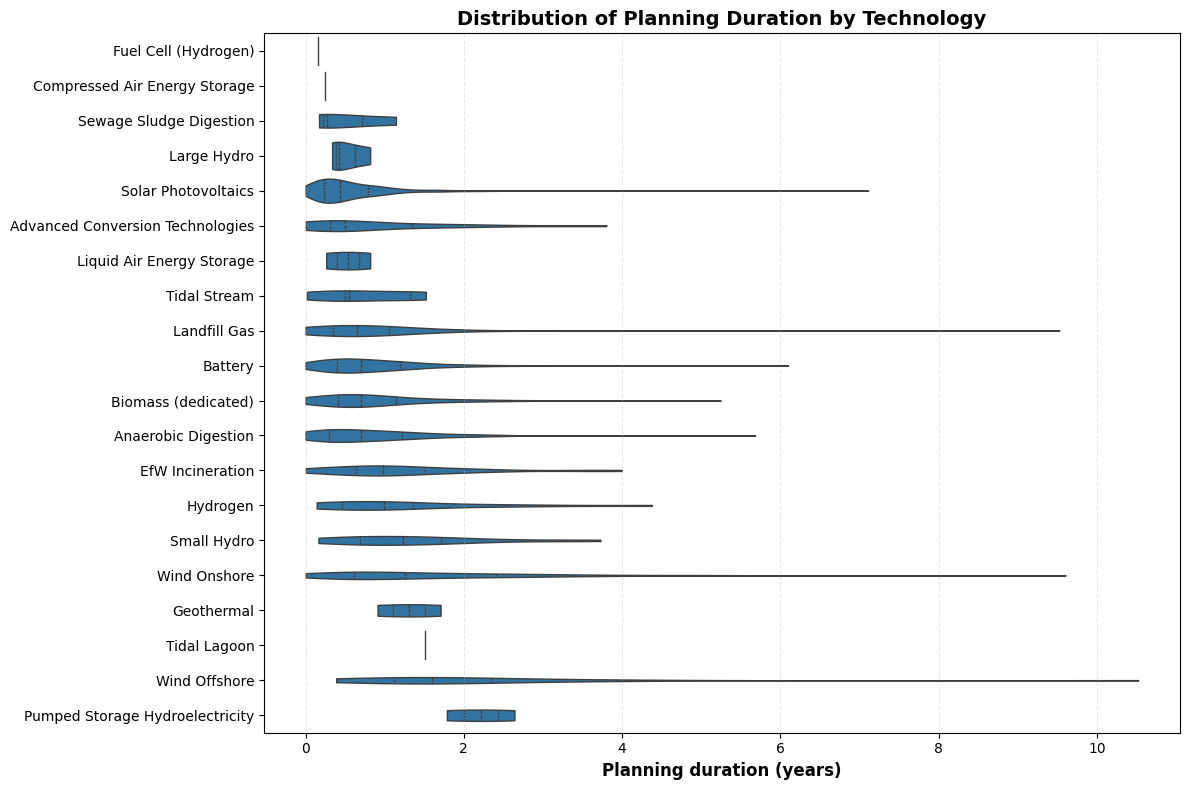

In [186]:
plt.figure(figsize=(12, 8))

sns.violinplot(
    data=plot_df,
    y='Technology Type',
    x='duration_years',
    order=order,
    inner='quartile',   # shows median + IQR
    cut=0,              # no extrapolation beyond data
    linewidth=1
)

plt.xlabel('Planning duration (years)', fontsize=12, fontweight='bold')
plt.ylabel('')
plt.title('Distribution of Planning Duration by Technology', fontsize=14, fontweight='bold')

plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


C:\Users\ikisy\AppData\Local\Temp\ipykernel_8172\2551038220.py:14: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(


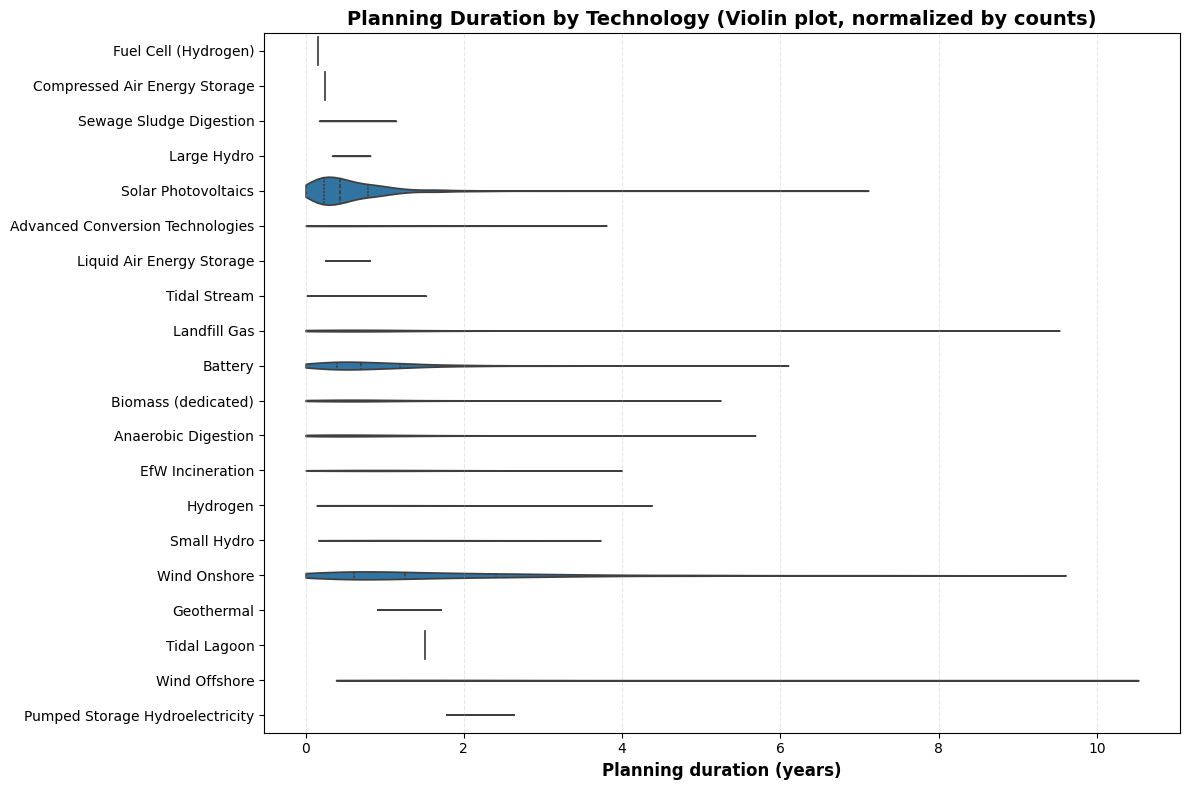

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remove negative durations
plot_df = filtered[filtered['duration_years'] >= 0].copy()



# Order by median duration
order = plot_df.groupby('Technology Type')['duration_years'].median().sort_values().index

plt.figure(figsize=(12, 8))

sns.violinplot(
    data=plot_df,
    y='Technology Type',
    x='duration_years',
    order=order,
    scale='count',     # width proportional to counts
    inner='quartile',
    cut=0
)

plt.xlabel('Planning duration (years)', fontsize=12, fontweight='bold')
plt.ylabel('')
plt.title('Planning Duration by Technology (Violin plot, normalized by counts)', fontsize=14, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [197]:
#keir strarmer tweets 

# Read both sheets at once
xls = pd.read_excel("keirStarmer_tweets.xlsx", sheet_name=None)

# Save sheets into variables
energy_tweets = xls[list(xls.keys())[0]]  # Sheet 1
all_tweets = xls[list(xls.keys())[1]]     # Sheet 2

# Check names of sheets (optional)
print(xls.keys())

dict_keys(['Sheet1', 'Sheet2'])


In [189]:
all_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   security                     8 non-null      float64
 1   transimission                0 non-null      float64
 2   environment/clean            3 non-null      float64
 3   infrastructure               12 non-null     float64
 4   offshore                     0 non-null      float64
 5   energy demand                0 non-null      float64
 6   jobs                         12 non-null     float64
 7   told money number            3 non-null      float64
 8   international collaboration  3 non-null      float64
 9   energy bill                  13 non-null     float64
 10  link                         25 non-null     object 
 11  notes                        24 non-null     object 
dtypes: float64(10), object(2)
memory usage: 2.5+ KB


In [190]:
import numpy as np 
import matplotlib.cm as cm

C:\Users\ikisy\AppData\Local\Temp\ipykernel_8172\783843262.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', len(topic_counts))


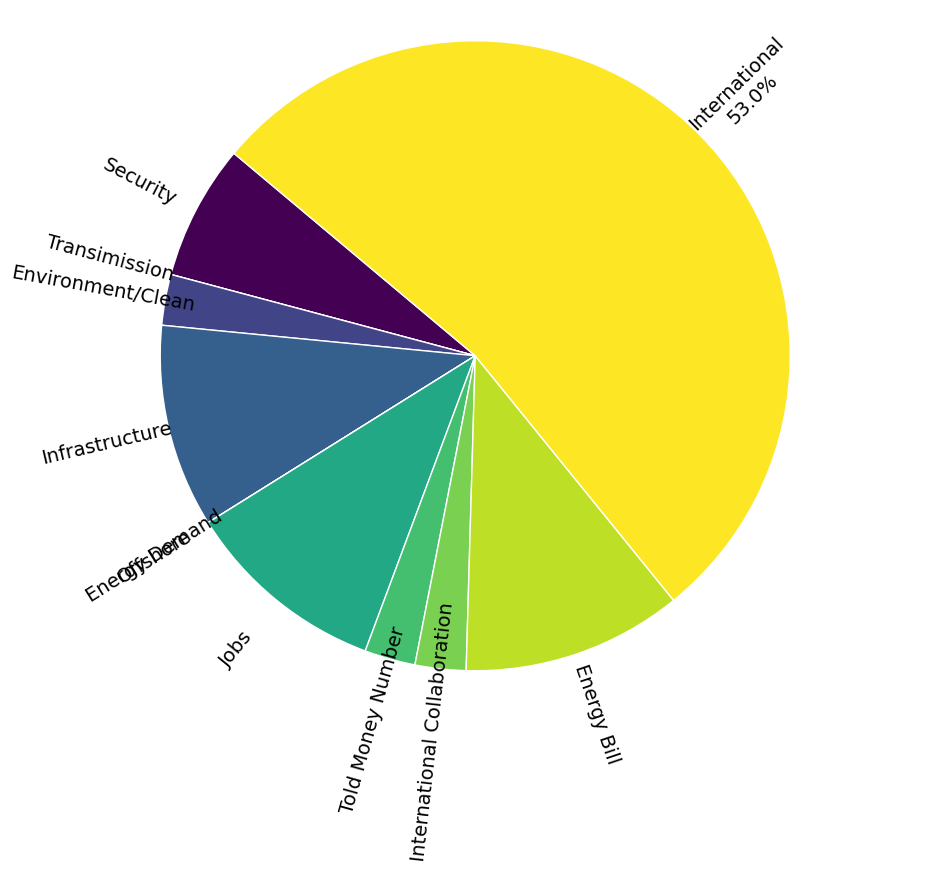

In [191]:
#visualize 

# ----------------------------
# rename
# ----------------------------
rename_map = {
    "community note": "Community",
    "ai law/data center": "AI",
    "economy (cost of living)": "Economy",
    "citizen rights (workers, woman and few immigrant)": "Citizen Rights",
    "international collab": "International",
    "attack on torries ": "Anti-Tories",
    "nhs": "NHS"
}

all_tweets = all_tweets.rename(columns=rename_map)
all_tweets.columns = all_tweets.columns.str.title()
all_tweets = all_tweets.rename(columns={"Nhs": "NHS", "Ai": "AI"})

# ----------------------------
# Select numeric topic columns
# ----------------------------
numeric_cols = all_tweets.select_dtypes(include=['float64', 'int64']).columns

# Sum numeric topic flags
topic_counts = all_tweets[numeric_cols].sum()

# Manually add international collab
topic_counts['International'] = 61

# Convert index to string
topic_counts.index = topic_counts.index.astype(str)

# ----------------------------
# Highlight topics
# ----------------------------
highlight_topics = ["National Security", "Community", "Energy", "International", "NHS"]
# ----------------------------
# Generate Viridis colors
# ----------------------------
cmap = cm.get_cmap('viridis', len(topic_counts))
colors = cmap(range(len(topic_counts)))

# ----------------------------
# Pie chart
# ----------------------------
fig, ax = plt.subplots(figsize=(12, 9))
wedges, _ = ax.pie(
    topic_counts,
    startangle=140,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1},
    colors=colors
)

total = topic_counts.sum()
start_angle = 140

# ----------------------------
# Add labels using angles
# ----------------------------
for i, w in enumerate(wedges):
    frac = topic_counts.iloc[i] / total
    theta = start_angle + frac * 360 / 2
    theta_rad = np.deg2rad(theta)

    x = 1.2 * np.cos(theta_rad)
    y = 1.2 * np.sin(theta_rad)

    label = topic_counts.index[i].strip()

    if label in highlight_topics:
        pct = frac * 100
        label_text = f"{label}\n{pct:.1f}%"
    else:
        label_text = label

    rotation = theta
    if theta > 90 and theta < 270:
        rotation += 180

    ax.text(x, y, label_text, rotation=rotation, ha='center', va='center', fontsize=14)

    start_angle += frac * 360

ax.axis('equal')
plt.show()

In [198]:
#energy ones

energy_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   security                     8 non-null      float64
 1   transimission                0 non-null      float64
 2   environment/clean            3 non-null      float64
 3   infrastructure               12 non-null     float64
 4   offshore                     0 non-null      float64
 5   energy demand                0 non-null      float64
 6   jobs                         12 non-null     float64
 7   told money number            3 non-null      float64
 8   international collaboration  3 non-null      float64
 9   energy bill                  13 non-null     float64
 10  link                         25 non-null     object 
 11  notes                        24 non-null     object 
dtypes: float64(10), object(2)
memory usage: 2.5+ KB


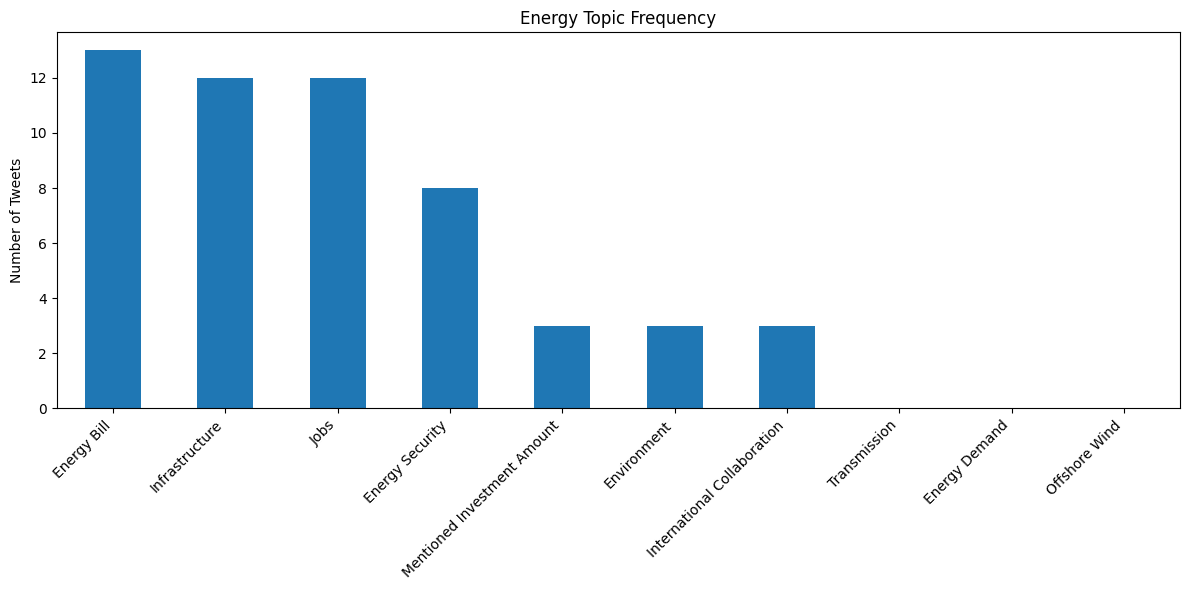

In [199]:
#energy ones

# 1) Select only numeric columns
energy_numeric = energy_tweets.select_dtypes(include=['int64', 'float64'])

# 2) Rename columns
rename_map = {
    "security": "Energy Security",
    "transimission": "Transmission",
    "environment/clean  ": "Environment",
    "infrastructure": "Infrastructure",
    "offshore ": "Offshore Wind",
    "energy demand": "Energy Demand",
    "jobs": "Jobs",
    "told money number": "Mentioned Investment Amount",
    "international collaboration": "International Collaboration",
    "energy bill": "Energy Bill"
}

energy_numeric = energy_numeric.rename(columns=rename_map)

# 3) Count how many tweets mention each topic
topic_counts = energy_numeric.sum().sort_values(ascending=False)

# 4) Plot
plt.figure(figsize=(12, 6))
topic_counts.plot(kind='bar')
plt.title("Energy Topic Frequency")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [200]:
#legislations 

passed = pd.read_csv("uk_legislations_2025_all.csv")

passed


,Title,Link
0,Employment Rights Act 2025,http://www.legislation.gov.uk/ukpga/2025/36/en...
1,Space Industry (Indemnities) Act 2025,http://www.legislation.gov.uk/ukpga/2025/35/en...
2,Planning and Infrastructure Act 2025,http://www.legislation.gov.uk/ukpga/2025/34/20...
3,Mental Health Act 2025,http://www.legislation.gov.uk/ukpga/2025/33/en...
4,Dogs (Protection of Livestock) (Amendment) Act...,http://www.legislation.gov.uk/ukpga/2025/32/en...
...,...,...
2015,The Gaming (Variation of Monetary Limits) Orde...,http://www.legislation.gov.uk/nisr/2025/2/2025...
2016,The Disclosure (Scotland) Act 2020 (Commenceme...,http://www.legislation.gov.uk/ssi/2025/2/made/...
2017,The Air Navigation (Restriction of Flying) (Ol...,http://www.legislation.gov.uk/uksi/2025/2/made
2018,The Housing Benefit and Universal Credit Housi...,http://www.legislation.gov.uk/nisr/2025/1/2025...


In [201]:
energy_terms = [
    "energy", "electricity", "power", "gas", "renewable", "wind", "solar", "nuclear",
    "infrastructure", "grid", "transmission", "distribution", "storage", "battery",
    "hydrogen", "oil", "coal", "petroleum", "carbon", "emissions", "decarbonisation",
    "climate", "net zero", "energy efficiency", "heating", "heat", "fuel cell",
    "EV charging", "smart meter", "interconnector", "metering", "capacity", "demand", "green"
]


In [202]:

mask = passed["Title"].str.contains("|".join(energy_terms), case=False, na=False)
energy_related = passed[mask]

energy_related.info()


<class 'pandas.core.frame.DataFrame'>
Index: 152 entries, 2 to 1998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   152 non-null    object
 1   Link    152 non-null    object
dtypes: object(2)
memory usage: 3.6+ KB


In [203]:
print(energy_related)

                                                  Title  \
2                  Planning and Infrastructure Act 2025   
20                        Great British Energy Act 2025   
69    The Oil and Gas Authority (Carbon Storage and ...   
70     The Five Estuaries Offshore Wind Farm Order 2025   
73       The Helios Renewable Energy Project Order 2025   
...                                                 ...   
1801  The Electricity Capacity Mechanism (Amendment)...   
1890  The Valuation (Telecommunications, Natural Gas...   
1940  The Electricity (Individual Exemption from the...   
1943  The Electricity (Individual Exemption from the...   
1998  The Council Tax (Demand Notices and Prescribed...   

                                                   Link  
2     http://www.legislation.gov.uk/ukpga/2025/34/20...  
20    http://www.legislation.gov.uk/ukpga/2025/16/20...  
69    http://www.legislation.gov.uk/uksi/2025/1379/m...  
70    http://www.legislation.gov.uk/uksi/2025/1376/m...  
7

In [204]:
#what percent of data

152/2020*100

7.524752475247524